# 12 Insurance Draft

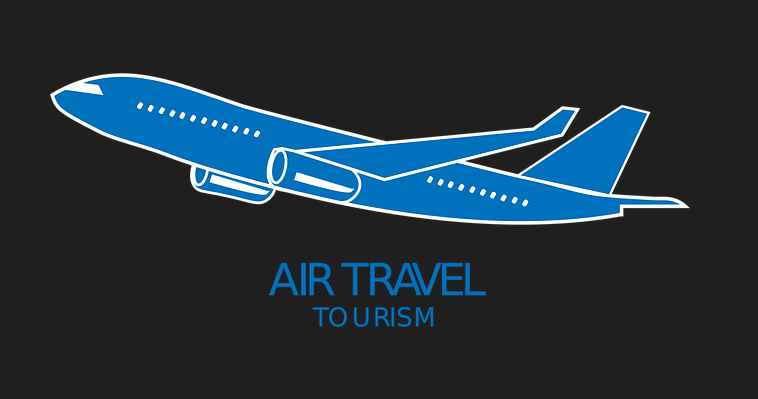

# Introduction

Travel insurance is a type of insurance policy that provides coverage for a range of unexpected events that can occur during a trip, such as medical emergencies, trip cancellations or interruptions, lost or stolen luggage, and other mishaps that can result in financial loss. Travel insurance can help travelers feel more secure and protected while traveling by providing financial compensation for unexpected expenses or losses. Depending on the policy, coverage can include medical expenses, emergency evacuation, trip cancellation or interruption, lost or stolen baggage, and other travel-related incidents. 

Travel insurance provides benefits to travelers by giving them peace of mind and protection against unexpected events that may occur while traveling. By promoting the benefits of travel insurance, insurers can encourage travelers to purchase policies and reduce their financial risk while traveling.

Travel insurance policies can generate significant revenue for insurers by charging premiums based on the level of coverage and the length of the trip. The insurance company assumes the risk of potential losses that the policyholder may incur during their trip, and in exchange, the policyholder pays a premium for that coverage.

# Dataset

In this project, I will analyze the data from nearly 2000 previous customers of an Indian travel insurance company from 2019. The data set contains nine (9) features regarding each customer. The target feature indicates if the customer bought travel insurance. The data set called, "Travel Insurance Prediction Data" is available on Kaggle.

# Goal

The goal of this project is to create a model with an accuracy score of 75% or higher to predict if a future customer will buy travel insurance.

# Technical Requirements

1. Download the data from Travel Insurance Prediction Data.
2. Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
3. Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
4. Apply various machine learning models to predict the TravelInsurance column using the other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods.
5. Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
6. Provide suggestions about how your analysis can be improved.

# Standards

> **Standard 1:** My standard for an acceptable accuracy score is 75%.<BR>
> **Standard 2:** My significance level (alpha) for all hypothesis tests is 0.05. <BR>
> **Standard 3:** My standard for a strong correlation between features is .08. <BR>    

# Biases

I did not identify big biases in this data set, except that some of the data lacked informative detail. For example, the data provides only general employment information, namely if the person is a government worker or works in the private sector. These categories are too broad. 

# Domain Knowledge

I have no experience in the travel or insurance industry. I may have overlooked parts of the data that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif


import warnings
import shap
import optuna
import logging
import tqdm

warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Display Parameters

## Display Features

In [4]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [5]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [6]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Data Overview and Preprocessing

In [14]:
insurance = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Insurance\\DataSet\\Insurance.csv",
    index_col=0,
)

In [15]:
insurance = insurance.rename(
    columns={
        "Employment Type": "EmploymentType",
        "GraduateOrNot": "Graduate",
        "EverTravelledAbroad": "TravelledAbroad",
    }
)

In [16]:
insurance.head()

,Age,EmploymentType,Graduate,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,TravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Number of Rows

In [9]:
insurance.shape[0]

1987

## Features of the Dataset

1. **Age:** Age of the customer
2. **Employment Type:** The sector in which customer is employed
3. **Graduate:** whether the customer is college graduate
4. **AnnualIncome:** The yearly income of the customer in Indian Rupee, rounded to the nearest fifty-thousand Rupees.
5. **FamilyMembers:** Number of members in customer's family
6. **ChronicDisease:** Whether the customer suffers from any major disease or conditions like diabetes/high bp or asthama,etc.
7. **FrequentFlyer:** Derived data based on customer's history of booking air tickets on at least 4 different instances in the last between 2017 and 2019.
8. **TravelledAbroad:** Has the customer ever travelled to a foreign country (not necessarily using the company's services).
9. **TravelInsurance:** Did the customer buy travel insurance package during introductory offering held in the year 2019.

## Missing Data

In [10]:
insurance.isnull().sum(axis=0)

Age                0
EmploymentType     0
Graduate           0
AnnualIncome       0
FamilyMembers      0
ChronicDiseases    0
FrequentFlyer      0
TravelledAbroad    0
TravelInsurance    0
dtype: int64

## Data Types

In [11]:
insurance.dtypes

Age                 int64
EmploymentType     object
Graduate           object
AnnualIncome        int64
FamilyMembers       int64
ChronicDiseases     int64
FrequentFlyer      object
TravelledAbroad    object
TravelInsurance     int64
dtype: object

### Section Summary
> * This dataset is made of nearly 2000 data points with 9 features. 
> * There is no missing data. 
> * Since there is no identifier of an individual data point, it is not possible to know if there are any duplicates.  

# Exploratory Data Analysis

## Age Distribution

In [ ]:
plt.rcParams.update(params)

ax = sns.countplot(
    x="Age",
    data=insurance,
    palette="Reds",
    order=insurance["Age"].value_counts().index,
)

total = len(insurance["Age"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 5.5
    y = p.get_y() + p.get_height() + 15
    ax.annotate(percentage, (x, y), size=12)

plt.title("Age Distribution of Customers")

### Section Summary
> * The age range is 25 to 35.
> * About 25% of the customers are 28, the youngest group.
> * Only 3% of the customers are 35, the oldest group.

## Employment Type

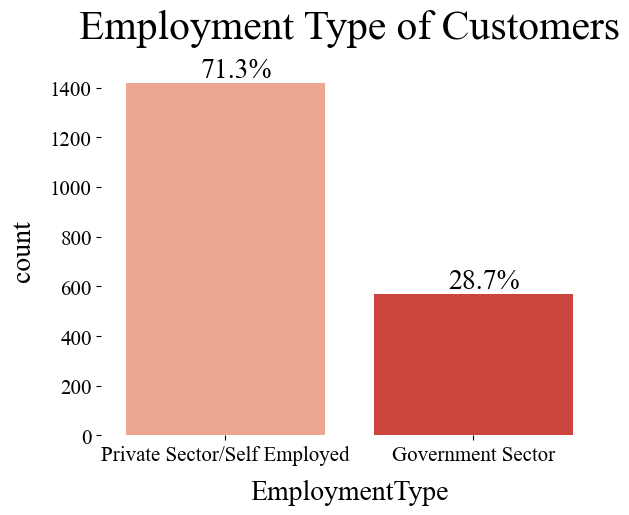

In [21]:
plt.rcParams.update(params)

ax = sns.countplot(
    x="EmploymentType",
    data=insurance,
    palette="Reds",
    order=insurance["EmploymentType"].value_counts().index,
)

total = len(insurance["EmploymentType"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 25
    ax.annotate(percentage, (x, y), size=20)

plt.title("Employment Type of Customers")

### Section Summary
> * Nearly 3/4 of customers are self-employed or work in the private sector. 
> * About 1/4 of customers are government workers. 
> * There is no other information about the work of the customers. 

## Level of Education

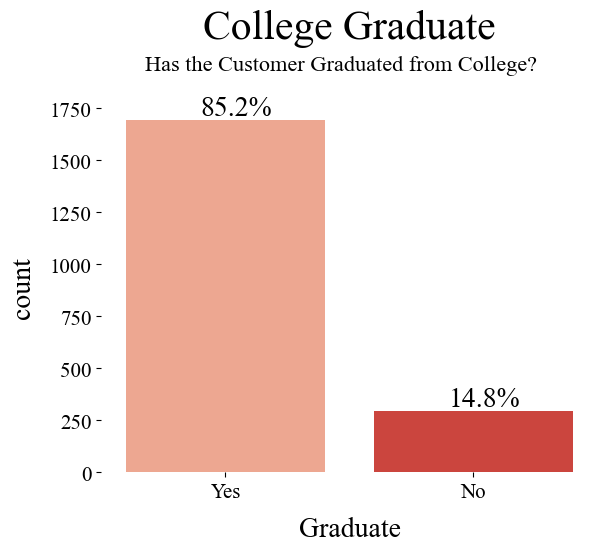

In [34]:
plt.rcParams.update(params)

ax = sns.countplot(
    x="Graduate",
    data=insurance,
    palette="Reds",
    order=insurance["Graduate"].value_counts().index,
)

total = len(insurance["Graduate"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height() + 25
    ax.annotate(percentage, (x, y), size=20)


plt.title("College Graduate", y=1.10)
plt.suptitle("Has the Customer Graduated from College?", fontsize=16)

## Hypothesis Test: College Graduates 

**Null**: There is no significant difference between the proportion of college graduates who bought travel insurance and non-graduates.<BR>
**Alternative**: A higher proportion of college graduates purchased travel insurance compared to non-graduates. 

In [19]:
grad_yes = insurance.loc[insurance["Graduate"] == "Yes"]
graduate_yes_insurance_yes = (grad_yes["TravelInsurance"] == 1).sum()
count_graduate_yes = (grad_yes["Graduate"] == "Yes").sum()
prop_graduate_yes = graduate_yes_insurance_yes / count_graduate_yes
print(
    f"Proportion of college graduate customers who bought travel insurance: {prop_graduate_yes:.2f}"
)

Proportion of graduate customers who bought travel insurance: 0.36


In [20]:
grad_no = insurance.loc[insurance["Graduate"] == "No"]
graduate_no_insurance_yes = (grad_no["TravelInsurance"] == 1).sum()
count_graduate_no = (grad_no["Graduate"] == "No").sum()
prop_graduate_no = graduate_no_insurance_yes / count_graduate_no
print(
    f"Proportion of non-graduate customers who bought travel insurance: {prop_graduate_no:.2f}"
)

Proportion of non-graduate customers who bought travel insurance: 0.34


In [21]:
from statsmodels.stats.proportion import proportions_ztest

numerator = np.array([graduate_yes_insurance_yes, graduate_no_insurance_yes])
denominator = np.array([count_graduate_yes, count_graduate_no])

stat, pval = proportions_ztest(numerator, denominator, alternative="two-sided")
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {pval:.2f}")

Z-statistic: 0.84
P-value: 0.40


### Section Summary
> * A large majority of customers (over 85%) are college graduates.
> * Only about 15% of customers are non-graduates.  
> * I conducted proportions z-test to test the hypothesis that there is no significant difference between the proportion of college graduates who bought travel insurance and non-graduates.
> * Using this test, the p-value obtained is much greater than the significance level of 0.05. 
> * Based on this evidence, we fail to reject the null hypothesis. We can conclude that there is not enough evidence to support that there is a significant difference between the proportion of college graduates who bought travel insurance and non-graduates.

## Annual Income

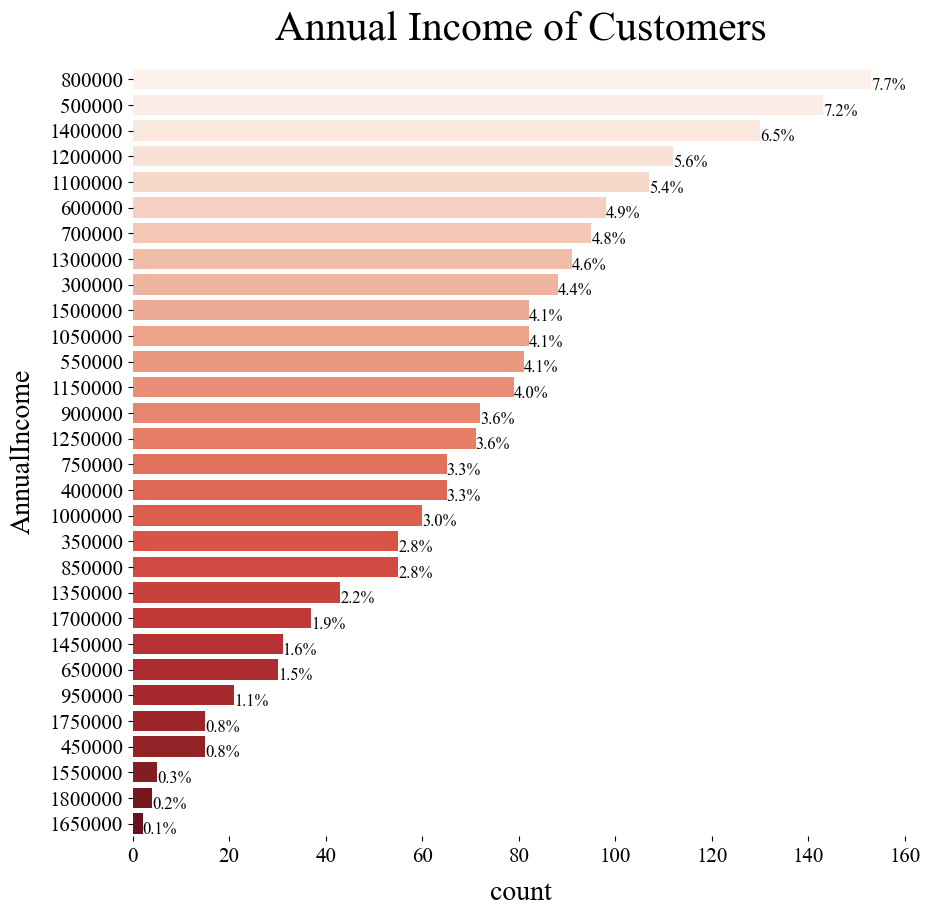

In [18]:
plt.rcParams.update(params)

plt.figure(figsize=(10, 10))
ax = sns.countplot(
    y="AnnualIncome",
    data=insurance,
    palette="Reds",
    order=insurance["AnnualIncome"].value_counts().index,
)

total = len(insurance["AnnualIncome"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12)

plt.title("Annual Income of Customers");

### Section Summary
> * There is a wide range of income categories: from 300,000 Rupees to 1,800,000 Rupees.
> * The category with the highest percentage of customers earns around 800,000 Rupees. However, this is only about 8% of the customers. 

## Number of Family Members

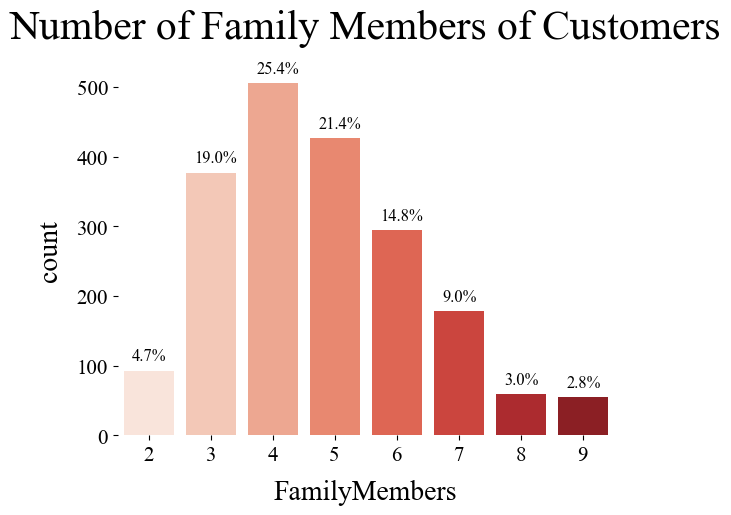

In [49]:
plt.rcParams.update(params)

ax = sns.countplot(x="FamilyMembers", data=insurance, palette="Reds")

total = len(insurance["Graduate"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 6
    y = p.get_y() + p.get_height() + 15
    ax.annotate(percentage, (x, y), size=12)

plt.title("Number of Family Members of Customers")

### Section Summary
> * It is not clear how the number of family members was counted. In the Western world, this number usually includes parents and children, but this may not be the case in Indian families. 
> * Nearly 50% of customers have families of 4 or 5 members, which could translate into 3 children for a nuclear family.

## History of Chronic Diseases

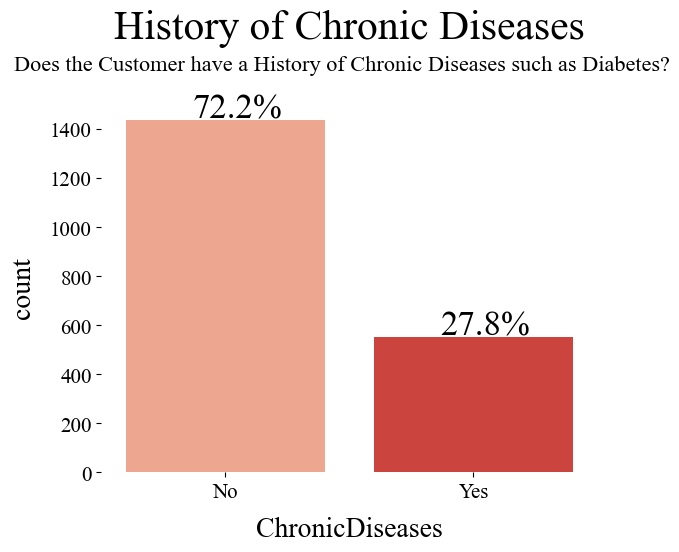

In [20]:
plt.rcParams.update(params)

ax = sns.countplot(x="ChronicDiseases", data=insurance, palette="Reds")

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

total = len(insurance["ChronicDiseases"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height() + 10
    ax.annotate(percentage, (x, y), size=25)

plt.title("History of Chronic Diseases", y=1.10)
plt.suptitle(
    "Does the Customer have a History of Chronic Diseases such as Diabetes?",
    fontsize=16,
);

## Hypothesis Test: History of Chronic Diseases

**Null**: There is no significant difference between the proportion of customers with a history of chronic diseases who bought travel insurance compared to customers without such a history.<BR>
**Alternative**: A higher proportion of customers with a history of chronic diseases purchased travel insurance compared to customers without a history of chronic diseases. 

In [21]:
disease_yes = insurance.loc[insurance["ChronicDiseases"] == 1]
disease_yes_insurance_yes = (disease_yes["TravelInsurance"] == 1).sum()
count_disease_yes = (disease_yes["ChronicDiseases"] == 1).sum()
prop_disease_yes = disease_yes_insurance_yes / count_disease_yes
print(
    f"Proportion of customers with a history of chronic diseases who bought travel insurance: {prop_disease_yes:.2f}"
)

Proportion of customers with a history of chronic diseases who bought travel insurance: 0.37


In [22]:
disease_no = insurance.loc[insurance["ChronicDiseases"] == 0]
disease_no_insurance_yes = (disease_no["TravelInsurance"] == 1).sum()
count_disease_no = (disease_no["ChronicDiseases"] == 0).sum()
prop_disease_no = disease_no_insurance_yes / count_disease_no
print(
    f"Proportion of customers without a history of chronic diseases who bought travel insurance: {prop_disease_no:.2f}"
)

Proportion of customers without a history of chronic diseases who bought travel insurance: 0.35


In [23]:
from statsmodels.stats.proportion import proportions_ztest

numerator = np.array([disease_yes_insurance_yes, disease_no_insurance_yes])
denominator = np.array([count_disease_yes, count_disease_no])

stat, pval = proportions_ztest(numerator, denominator, alternative="two-sided")
print(f"Z-statistic: {stat:.2f}")
print(f"P-value: {pval:.2f}")

Z-statistic: 0.81
P-value: 0.42


### Section Summary
> * Nearly 3/4 of customers reported no history of chronic diseases.  
> * I conducted proportions z-test to test the hypothesis that there is no significant difference between the proportion of customers with a history of chronic diseases who bought travel insurance compared to customers without such a history. 
> * The p-value obtained is much greater than the significance level of 0.05. 
> * Therefore, we fail to reject the null hypothesis and we can conclude that there is not enough evidence to support that a significant difference between the proportion of customers with a history of chronic diseases who bought travel insurance compared to customers without such a history exists. 

## Frequent Flyer

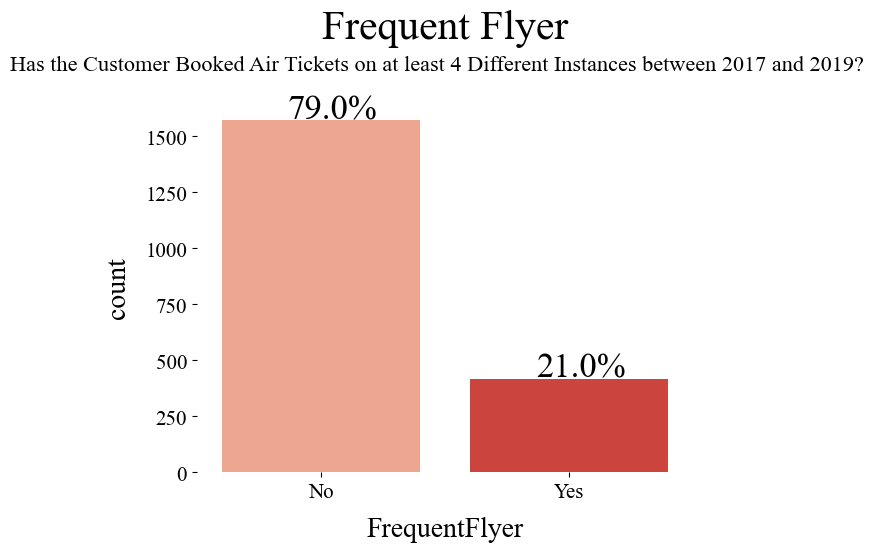

In [24]:
plt.rcParams.update(params)

ax = sns.countplot(x="FrequentFlyer", data=insurance, palette="Reds")

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

total = len(insurance["FrequentFlyer"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height() + 10
    ax.annotate(percentage, (x, y), size=25)

plt.title("Frequent Flyer", y=1.10)
plt.suptitle(
    "Has the Customer Booked Air Tickets on at least 4 Different Instances between 2017 and 2019?",
    fontsize=16,
);

### Section Summary
> * A frequent flyer is defined as a customer who booked air tickets on at least 4 different instances between 2017 and 2019.
> * Nearly 3/4 of the customers were defined as frequent flyers. 

## History of Travel Abroad

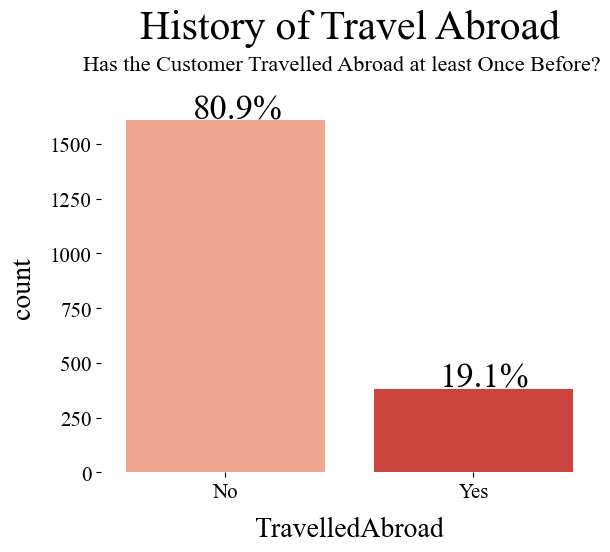

In [25]:
plt.rcParams.update(params)
ax = sns.countplot(x="TravelledAbroad", data=insurance, palette="Reds")

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

total = len(insurance["TravelledAbroad"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height() + 10
    ax.annotate(percentage, (x, y), size=25)

plt.title("History of Travel Abroad", y=1.10)
plt.suptitle("Has the Customer Travelled Abroad at least Once Before?", fontsize=16);

### Section Summary
> * The TravelledAbroad feature was defined as a customer who has traveled abroad at least once.
> * A large majority of customers (over 80%) reported that they had never traveled abroad. 

## Travel Insurance Purchase

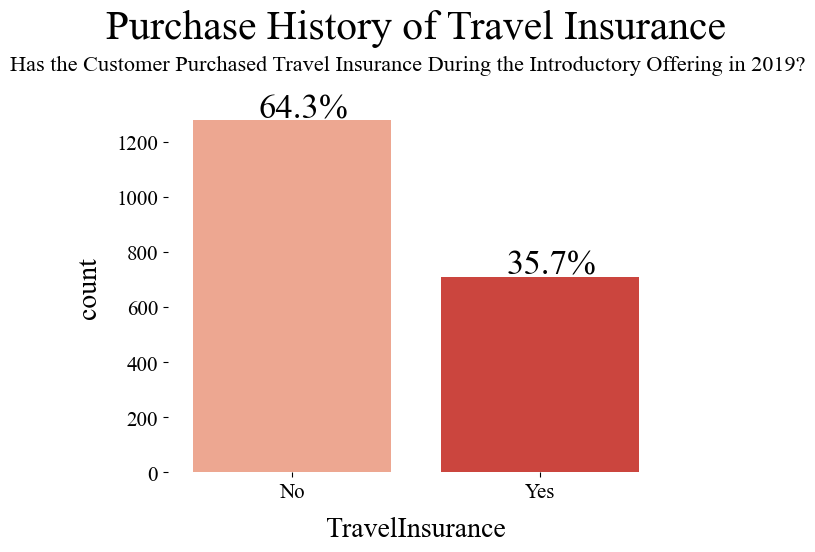

In [65]:
plt.rcParams.update(params)

ax = sns.countplot(
    x="TravelInsurance",
    data=insurance,
    palette="Reds",
    order=insurance["TravelInsurance"].value_counts().index,
)

custom_labels = ["No", "Yes"]
plt.xticks(range(len(custom_labels)), custom_labels)

total = len(insurance["TravelInsurance"])
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height() + 10
    ax.annotate(percentage, (x, y), size=25)

plt.title("Purchase History of Travel Insurance", y=1.10)
plt.suptitle(
    "Has the Customer Purchased Travel Insurance During the Introductory Offering in 2019?",
    fontsize=16,
)

### Section Summary
> * Only about 1/3 of customers bought travel insurance. 
> * More data could make the reason for this observation clearer. 

# Correlations

## Correlation between each Feature and the Travel Insurance Feature

In [144]:
corr_matrix = insurance.corr(numeric_only=True)
corr_matrix["TravelInsurance"].sort_values(ascending=False)

TravelInsurance    1.000000
TravelledAbroad    0.433183
AnnualIncome       0.396763
FrequentFlyer      0.232103
EmploymentType     0.147847
FamilyMembers      0.079909
Age                0.061060
Graduate           0.018934
ChronicDiseases    0.018190
Name: TravelInsurance, dtype: float64

## Correlations between Features

In [116]:
def create_heatmap(data, title):
    """
    Creates a Seaborn heatmap.
    """

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(8, 8))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
        cmap=plt.cm.Reds,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

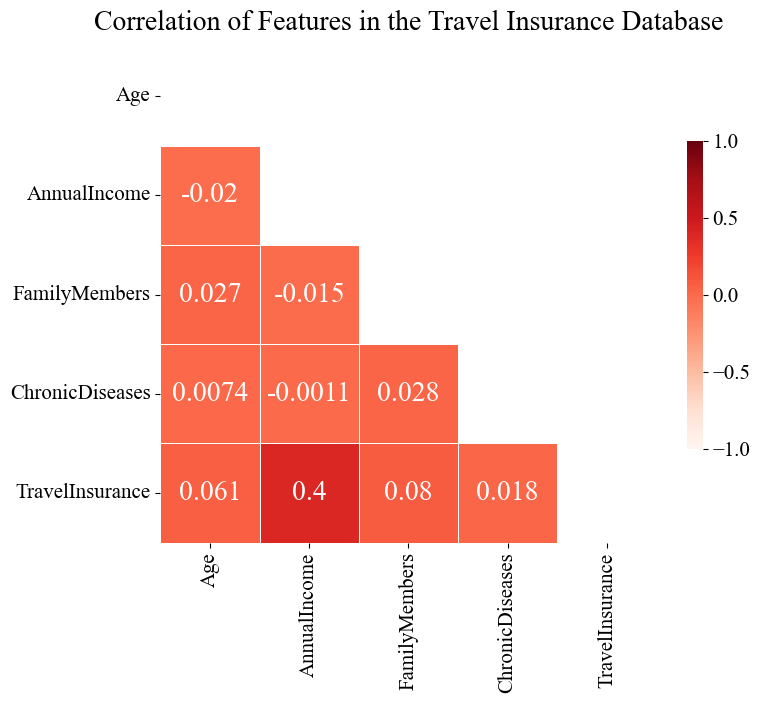

In [117]:
title = "Correlation of Features"
create_heatmap(insurance, title)

### Section Summary
> * There are very weak correlations between each feature and other features. 
> * Furthermore, the correlations between each feature and the target feature are also very weak.

# Machine Learning

In [28]:
label_encoder = LabelEncoder()
obj = insurance.dtypes == "object"

for col in list(obj[obj].index):
    insurance[col] = label_encoder.fit_transform(insurance[col])

In [29]:
X = insurance.drop("TravelInsurance", axis=1)
y = insurance["TravelInsurance"]

X, y = shuffle(X, y, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

# K-Fold Cross Validation

In [34]:
logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])

decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])

knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10)
    print(f"{name}: {scores.mean():.2f}")

Logistic Regression: 0.64
Decision Tree: 0.78
KNN: 0.81


### Section Summary
> * Since this is a rather simple dataset, I decided to create baselines with default hyperparameters and 10-Fold Cross-validation using three of the simpler machine learning models: Logistic Regression, Decision Tree, and K Nearest Neighbors. Accuracy Scores:
> * Logistic Regression: 0.64
> * Decision Tree: 0.78
> * KNN: 0.81
> * Only KNN surpassed the 75% accuracy standard.   

# Feature Reduction

## Feature Reduction Based on Correlation Analysis

In [47]:
X_reduced_corr = insurance[["AnnualIncome", "TravelledAbroad", "FrequentFlyer"]]
y = insurance["TravelInsurance"]
X_reduced_corr, y = shuffle(X_reduced_corr, y, random_state=None)

In [48]:
logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])

decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])

knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_reduced_corr, y, cv=10)
    print(f"{name}: {scores.mean():.2f}")

Logistic Regression: 0.64
Decision Tree: 0.79
KNN: 0.75


### Section Summary
> * For this section, I picked the top 3 most correlated features with the target feature. The most correlated features are AnnualIncome, TravelledAbroad, FrequentFlyer.  Accuracy Scores:
> * Logistic Regression: 0.64
> * Decision Tree: 0.79
> * KNN: 0.72
> * None of the models surpassed the 75% standard for accuracy score. 

## Feature Reduction Based on SHAP Explainer

100%|████████████████████████████████████████████████████████████████████████████████| 398/398 [00:06<00:00, 57.60it/s]


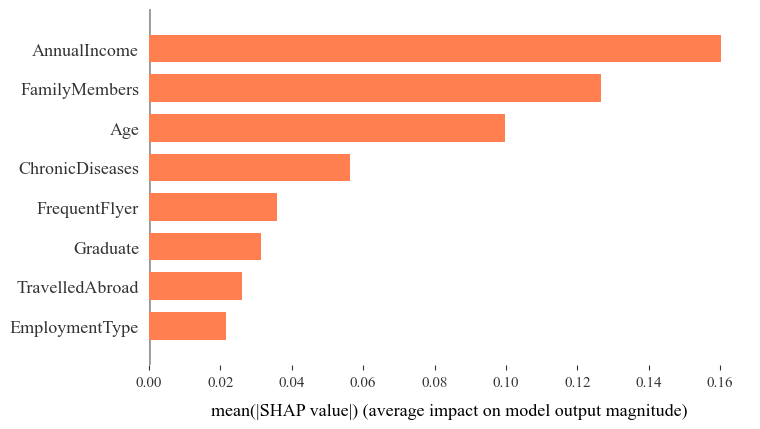

In [70]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

sampled_X = shap.sample(X, 100)

explainer = shap.KernelExplainer(dtc.predict_proba, sampled_X)

shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[0], X_test, plot_type="bar", color=color_11)

In [49]:
X_reduced_SHAP = insurance[["AnnualIncome", "Age", "FamilyMembers"]]
y = insurance["TravelInsurance"]
X_reduced_SHAP, y = shuffle(X_reduced_SHAP, y, random_state=None)

In [50]:
logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])

decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])

knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_reduced_SHAP, y, cv=10)
    print(f"{name}: {scores.mean():.2f}")

Logistic Regression: 0.64
Decision Tree: 0.81
KNN: 0.82


### Section Summary
> * For this section, I used SHAP and picked the top 3 features with the most impact on the target. The features are AnnualIncome, Age, FamilyMembers. Accuracy Scores:
> * Logistic Regression: 0.64
> * Decision Tree: 0.81
> * KNN: 0.82
> * Both Decision Tree and KNN surpassed the 75% accuracy score standard. 

## Feature Reduction with Backward Elimination

In [45]:
selector = SelectKBest(score_func=f_classif, k=3)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

logisticregression_pipeline = Pipeline([("lr", LogisticRegression())])

logisticregression_pipeline.fit(X_train_reduced, y_train)


decisiontree_pipeline = Pipeline([("dt", DecisionTreeClassifier())])

decisiontree_pipeline.fit(X_train_reduced, y_train)


knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])

knn_pipeline.fit(X_train_reduced, y_train)


pipelines = {
    "Logistic Regression": logisticregression_pipeline,
    "Decision Tree": decisiontree_pipeline,
    "KNN": knn_pipeline,
}


for name, pipeline in pipelines.items():
    score = pipeline.score(X_test_reduced, y_test)
    print(f"Test accuracy {name}: {score:.2f}")
    selected_indices = selector.get_support(indices=True)
    print(f"Selected feature indices: {selected_indices}", end="\n\n")

Test accuracy Logistic Regression: 0.64
Selected feature indices: [3 6 7]

Test accuracy Decision Tree: 0.77
Selected feature indices: [3 6 7]

Test accuracy KNN: 0.71
Selected feature indices: [3 6 7]



### Section Summary
> * For this section, I used Backward Elimination to pick the top 3 features with the most impact on the target. These features are AnnualIncome, TravelledAbroad, FrequentFlyer. 
> * These are the same features identified by the correlation analysis. The results I obtained were the same as the results with features identified by the correlation analysis:
> * Logistic Regression: 0.64
> * Decision Tree: 0.77
> * KNN: 0.71
> * None of the models surpassed the 75% standard for accuracy score. 

# Optuna

## Logistic Regression with Optuna

In [36]:
def logisticregression_optuna_objective(trial):

    penalty = trial.suggest_categorical("penalty", ["none", "l2"])
    C = trial.suggest_loguniform("C", 1e-5, 10)
    solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "sag", "saga"])

    model = LogisticRegression(penalty=penalty, C=C, solver=solver)

    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [37]:
logisticregression_study = optuna.create_study(direction="maximize")
logisticregression_study.optimize(logisticregression_optuna_objective, n_trials=100)

In [38]:
best_params = logisticregression_study.best_params
print(f"Best Accuracy Score: {logisticregression_study.best_value:.5f}")
print("Best hyperparameters:", best_params)

Best Accuracy Score: 0.78141
Best hyperparameters: {'penalty': 'l2', 'C': 0.017132247300763133, 'solver': 'newton-cg'}


In [39]:
logisticregression_optuna = LogisticRegression(**best_params)
logisticregression_optuna.fit(X_train, y_train)

LogisticRegression(C=0.017132247300763133, solver='newton-cg')

In [40]:
y_predict = logisticregression_optuna.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       246
           1       0.86      0.51      0.64       152

    accuracy                           0.78       398
   macro avg       0.81      0.73      0.74       398
weighted avg       0.80      0.78      0.77       398



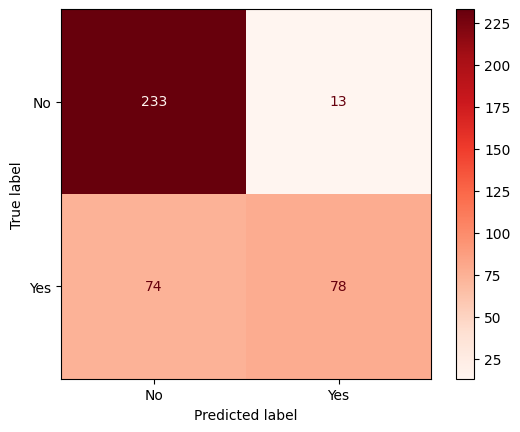

In [42]:
plot_confusion_matrix(logisticregression_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

## Decision Tree with Optuna

In [36]:
def decisiontree_optuna_objective(trial):

    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    splitter = trial.suggest_categorical("splitter", ["best", "random"])
    max_depth = trial.suggest_int("max_depth", 1, 32)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
    )
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [37]:
decisiontree_study = optuna.create_study(direction="maximize")
decisiontree_study.optimize(decisiontree_optuna_objective, n_trials=100)

In [38]:
print(f"Best Accuracy Score: {decisiontree_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in decisiontree_study.best_params.items():
    print(f"\t{key}: {value}")

Best Accuracy Score: 0.83417
Best hyperparameters:
	criterion: entropy
	splitter: best
	max_depth: 4
	min_samples_split: 5
	min_samples_leaf: 7


In [39]:
decisiontree_best_params = decisiontree_study.best_params

decisiontree_optuna = DecisionTreeClassifier(
    criterion=decisiontree_best_params["criterion"],
    splitter=decisiontree_best_params["splitter"],
    max_depth=decisiontree_best_params["max_depth"],
    min_samples_split=decisiontree_best_params["min_samples_split"],
    min_samples_leaf=decisiontree_best_params["min_samples_leaf"],
    random_state=0,
)
decisiontree_optuna.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=7,
                       min_samples_split=5, random_state=0)

In [40]:
y_predict = decisiontree_optuna.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       265
           1       0.90      0.56      0.69       133

    accuracy                           0.83       398
   macro avg       0.86      0.77      0.79       398
weighted avg       0.85      0.83      0.82       398



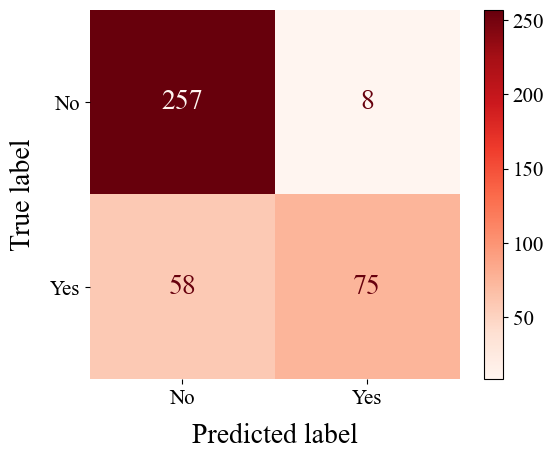

In [42]:
plot_confusion_matrix(decisiontree_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

## KNN with Optuna

In [43]:
def knn_optuna_objective(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 3, 20)
    p = trial.suggest_int("p", 1, 2)

    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    model.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    return accuracy

In [44]:
knn_study = optuna.create_study(direction="maximize")
knn_study.optimize(knn_optuna_objective, n_trials=100)

In [45]:
print(f"Best accuracy score: {knn_study.best_value:.5f}")
print("Best hyperparameters:")
for key, value in knn_study.best_params.items():
    print(f"\t{key}: {value}")

Best accuracy score: 0.82915
Best hyperparameters:
	n_neighbors: 6
	p: 2


In [46]:
knn_best_params = knn_study.best_params
knn_optuna = KNeighborsClassifier(
    n_neighbors=knn_best_params["n_neighbors"], p=knn_best_params["p"]
)
knn_optuna.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [47]:
y_predict = knn_optuna.predict(X_test)

In [48]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       265
           1       0.88      0.56      0.69       133

    accuracy                           0.83       398
   macro avg       0.85      0.76      0.79       398
weighted avg       0.84      0.83      0.82       398



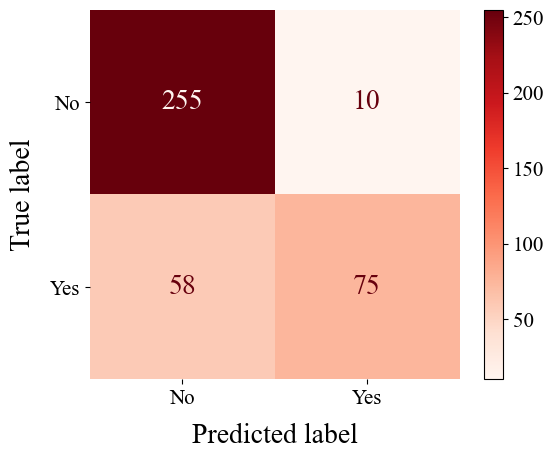

In [49]:
plot_confusion_matrix(knn_optuna, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

### Section Summary
> * For this section, I used OPTUNA to choose the most optimal hyperparameters for each of the three models.  
> * The results I obtained were considerably better than the previous results in this report:
> * Logistic Regression: 0.78
> * Decision Tree: 0.82
> * KNN: 0.81
> * The accuracy scores of all three models surpassed the 75% accuracy score standard.

# Three-Model Stacking Classifier

In [50]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

estimators = [("lr", model1), ("knn", model2), ("dt", model3)]
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

In [51]:
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [52]:
y_predict = stacking_clf.predict(X_test)

In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       265
           1       0.68      0.57      0.62       133

    accuracy                           0.77       398
   macro avg       0.74      0.72      0.73       398
weighted avg       0.76      0.77      0.76       398



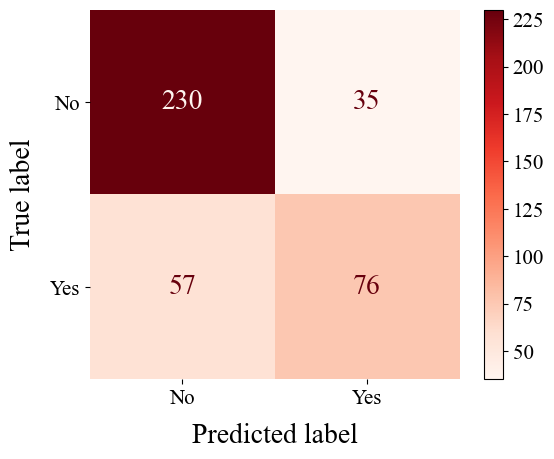

In [54]:
plot_confusion_matrix(stacking_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

### Section Summary
> * For this section, I used Stacking Classifier with the three models and obtained an accuracy score of 77%, which surpasses the 75% standard for accuracy score by a small and perhaps insignificant margin. 

# Three-Model Soft Voting Classifier

In [55]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

soft_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="soft"
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', KNeighborsClassifier()),
                             ('svc', DecisionTreeClassifier())],
                 voting='soft')

In [56]:
y_predict = soft_voting_clf.predict(X_test)

In [57]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       265
           1       0.65      0.58      0.61       133

    accuracy                           0.76       398
   macro avg       0.73      0.71      0.72       398
weighted avg       0.75      0.76      0.75       398



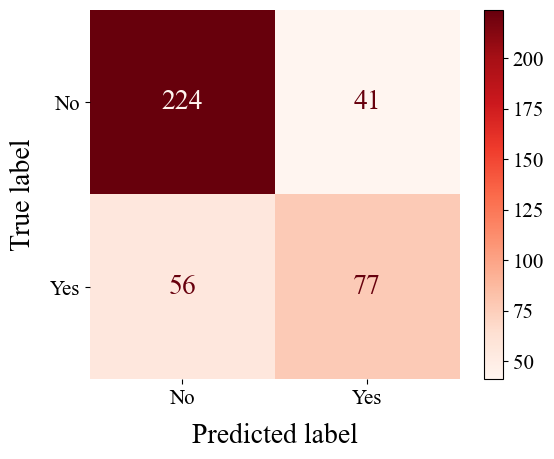

In [59]:
plot_confusion_matrix(soft_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

### Section Summary
> * For this section, I used Soft Voting Classifier with the three models and obtained an accuracy score of 76%, which surpasses the 75% standard for accuracy score by a small and perhaps insignificant margin. 

# Three-Model Hard Voting Classifier

In [60]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

hard_voting_clf = VotingClassifier(
    estimators=[("lr", model1), ("rf", model2), ("svc", model3)], voting="hard"
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', KNeighborsClassifier()),
                             ('svc', DecisionTreeClassifier())])

In [61]:
y_predict = hard_voting_clf.predict(X_test)

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       265
           1       0.82      0.55      0.66       133

    accuracy                           0.81       398
   macro avg       0.81      0.74      0.76       398
weighted avg       0.81      0.81      0.80       398



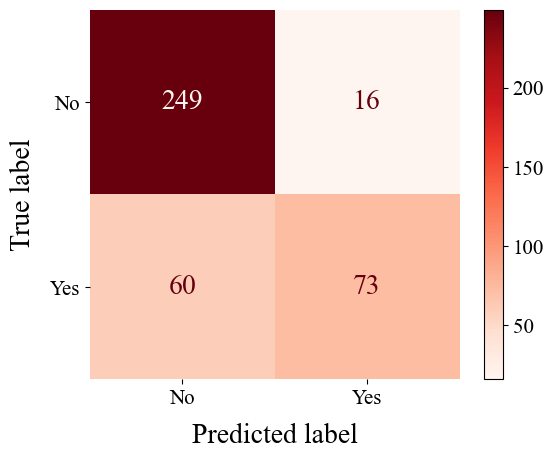

In [63]:
plot_confusion_matrix(hard_voting_clf, X_test, y_test, cmap=plt.cm.Reds)
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"]);

### Section Summary
> * For this section, I used Hard Voting Classifier with the three models and obtained an accuracy score of 80%, which surpasses the 75% standard for accuracy score. 

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 2000 data points related to customers of a travel insurance business. <br> 
>* **The Goal of the Project:** The goal of this project was to find a model that could predict if a new customer would buy travel insurance with a high level of accuracy (75% or higher).<br>
>* **Models:** I utilized several models with varying results.<br>
>* **Performance of Models:** Some of the models exceeded the 75% accuracy standard. K Nearest (using the default hyperparameters) was able to get better or similar results than any other model, including the more complex ones.<br>  
>* **Feature Engineering and Hyperparameter Testing:** I tried feature engineering and hyperparameter testing with techniques such as Backward Elimination, SHAP and OPTUNA. OPTUNA showed the best results.<br> 
>* **Stochastic System:** Human behavior is hard to classify and cannot be easily capsulized and predicted. For this reason, obtaining a very high accuracy score (over 80%) may be very difficult to do.<br> 
>* **Business Recommendation:** With accuracy scores of over 80% using some of the models, I recommend utilizing a simple KNN machine learning model to predict if a future customer will purchase travel insurance.<br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **Domain Knowledge:** It is best if the data scientist has adequate domain knowledge on the topic of the analysis. I do not have any expertise in the insurance or travel industry. There may be parts of the data that I have overlooked that may have been important and I may have given importance to parts that may have had little significance. <br>
>* **More Detailed Data on Customers:** The data provide only general employment information, namely if the person is a government worker or works in the private sector. These categories are too broad. More detailed information could have helped make better predictions. <br>  
>* **Statistics:** Continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** Continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** Continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** Continue to write better and more efficient Python code. <br>
>* **Clean Code:** Continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** Continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>

# Image Credit

Image by <a href="https://pixabay.com/users/mytz-4882715/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2640661">MYTZ</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=2640661">Pixabay</a>